In [56]:
!pip install opencv-python
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


# 1 IMAGE LOADING FUNCTION


In [58]:
# Load our image
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()
    return img

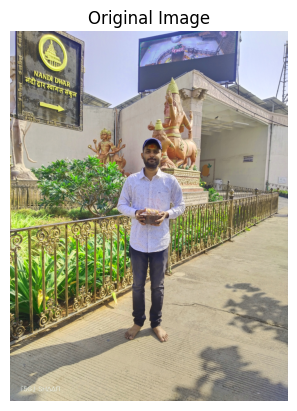

In [59]:
filename = "mohit.jpg"
img = read_file(filename)

# Make backup
org_img = np.copy(img)

# 2 EDGE MASK (Black Outline)

In [60]:
#Create Edge Mask
def edge_mask(img, line_size, blur_value):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Reduce noise before threshold
    gray_blur = cv2.medianBlur(gray, blur_value)

    # Detect edges
    edges = cv2.adaptiveThreshold(
        gray_blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        line_size,
        blur_value
    )
    return edges

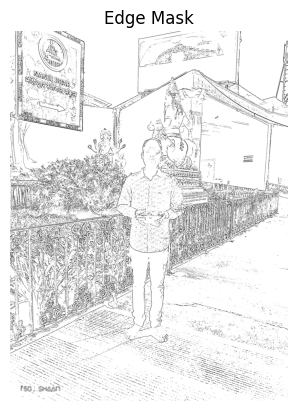

In [61]:
line_size , blur_value = 7, 7
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.title("Edge Mask")
plt.axis("off")
plt.show()

# 3 COLOR QUANTIZATION USING K-MEANS (soft Cartoon colors)

In [62]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))

    # K-means stopping criteria
    criteria = (
        cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
        20, 0.001
    )

    # Apply k-means
    _, label, center = cv2.kmeans(
        data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # Convert back to uint8 and reshape
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

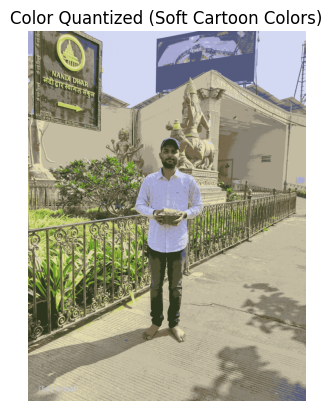

In [73]:
img_q = color_quantization(img, k=12)

plt.imshow(img_q)
plt.title("Color Quantized (Soft Cartoon Colors)")
plt.axis("off")
plt.show()

# 4 SMOOTHING USING BILATERAL FILTER (Cartoon-style smooth shading)

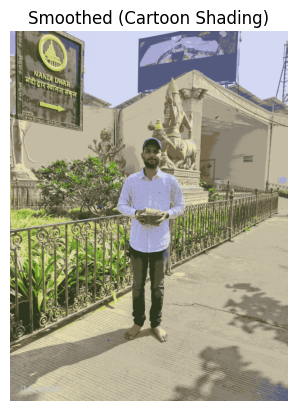

In [74]:
smooth = cv2.bilateralFilter(img_q, d=9, sigmaColor=200, sigmaSpace=200)

plt.imshow(smooth)
plt.title("Smoothed (Cartoon Shading)")
plt.axis("off")
plt.show()

# 5 FINAL CARTOON / Cartoon STYLE COMBINATION

In [75]:
def cartoonize_image(color_img, edge_mask):
    # edges 255 → keep color, 0 → black outline
    edges_inv = cv2.cvtColor(edge_mask, cv2.COLOR_GRAY2RGB)
    cartoon = cv2.bitwise_and(color_img, edges_inv)
    return cartoon

cartoon = cartoonize_image(smooth, edges)

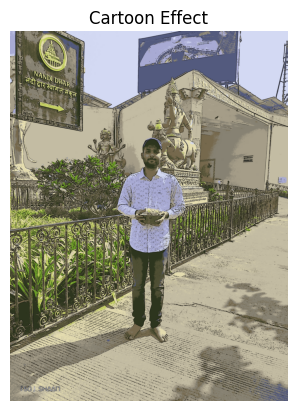

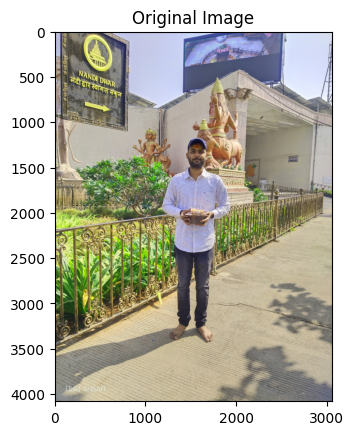

In [76]:
plt.imshow(cartoon)
plt.title("Cartoon Effect")
plt.axis("off")
plt.show()

#originale image show 
plt.title("Original Image")
plt.imshow(org_img)

plt.show()